# Ford GoBikes Explanatory Analysis
## by George Kariuki


## Investigation Overview


The overarching goal of this project was to ascertain the factors affecting the duration of trips logged in from users who were using the bikes. 

The main focus was on how age affected the duration. Age was also coupled with User Type which provided a rather interesting observation worth documenting.


## Dataset Overview

The data consisted of 183,412 records with 16 features. The features include duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id, user_type,member_birth_year, member_gender, bike_share_for_all_trip. 9 features are numeric, 2 features are datetime objects, 1 boolean based feature and 4 objects based features. No records were dropped - the data was clean without any duplicates.

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
ford_copy = pd.read_csv('ford_copy.csv')
ford_copy.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
ford_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0


## Distribution of Duration in Seconds

The Ford GoBike dataset provides data on the duration of each trip logged in by a user. This duration was measured in seconds and ranged from 61 second trips all the way to 85444 seconds - this is approximately a whole day. Due to it's large size, zooming in to a small space through the use of limits and using a logarithmic scale, we get a unimodal curve showing the distribution of the duration feature.

We expect that age should be a factor contributing to the bell shaped curve of the duration.

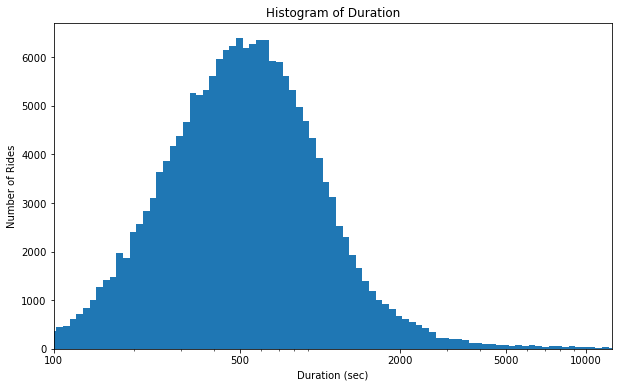

In [19]:
plt.figure(figsize=[10, 6])
plt.hist(data=ford_copy, x='duration_sec', 
         bins=10**np.arange(np.log10(ford_copy.duration_sec.min()), np.log10(ford_copy.duration_sec.max())+0.025, 
                            0.025)
        )
plt.xscale('log')
plt.xticks([100, 500, 2000, 5000, 10000],['100', '500', '2000', '5000', '10000'])
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Rides')
plt.xlim(100, 12500)
plt.title('Histogram of Duration');

## Duration versus Age

Age was plotted against the log of Duration (sec), and a heatmap was produced. A key highlight of the heatmap revealed that the most active participants were those in the age group of 20 - 40. This age group were concentrated in the lower left regions of the heatmap meaning they were not riding the bikes for very long. We might have expected the age group to log longer periods but this was not the case. 

It is interesting to note the 60-80 group have logging enough hours to be featured in the heatmap despite their ages. This means there is quite an active older generation in the area.

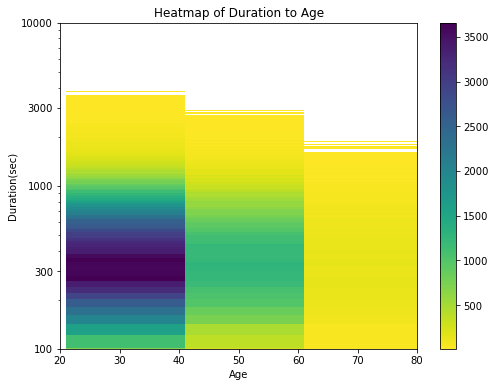

In [20]:
# Heat Map of Age and Duration
plt.figure(figsize=[8, 6])
binx = np.arange(ford_copy.age.min(), ford_copy.age.max()+20, 20)
biny = np.arange(ford_copy.duration_sec.min(), ford_copy.duration_sec.max()+20, 20)
plt.hist2d(data=ford_copy, x='age', y='duration_sec', bins=[binx, biny], cmin=10, cmap='viridis_r')
plt.yscale('log')
plt.yticks([100, 300, 1000, 3000, 10000, 100000],['100', '300', '1000', '3000','10000', '100000'])
plt.colorbar()
plt.ylim(100, 10000)
plt.xlim(20, 80)
plt.ylabel('Duration(sec)')
plt.xlabel('Age')
plt.title('Heatmap of Duration to Age');

## Age and Duration by User Type
An interesting aspect as seen when age and duration was plotted against User Type. User Type consists of two categories - Subscribers - those with an active and inactive subscription, and Customers - those who haven't subscribed to the Ford GoBikes.

The multivariate plots revealed that although subscribers are the largest group as compared to the customers, customers logged more time with the bikes than the subscribers. Subsribers dominated the lower regions across the chart clocking in lower times with the bikes.

Subscriber ages spread quite evenly across the charts while customers dominated in the 20 - 50 region. Customers were sparce in the 50 - 80 region.

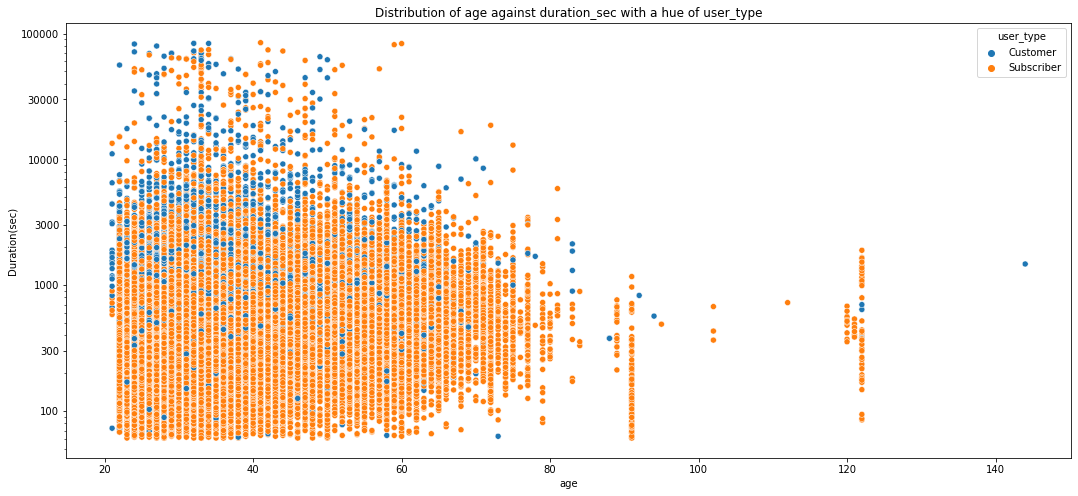

In [24]:
def sns_scatter(features, x, y='duration_sec', log=True, data=ford_copy, figsize=[18,8]):
    "Plots a scatter plot"
    rows = 1
    col = len(features)
    count = 1
    plt.figure(figsize=figsize)
    for i in features:
        plt.subplot(rows, col, features.index(i)+1)
        sns.scatterplot(data=data, x=x, y=y, hue=i);
        if log:
            plt.yscale('log')
            plt.yticks([100, 300, 1000, 3000, 10000, 30000, 100000],
                       ['100', '300', '1000', '3000', '10000', '30000', '100000'])
        plt.ylabel('Duration(sec)')  
        plt.title('Distribution of '+x+' against '+y+' with a hue of '+i); 
        
sns_scatter(features=['user_type'], x='age')

In [27]:
# !jupyter nbconvert Part_II_Ford_GoBike_explanatory_analysis.ipynb --to slides --post serve --no-input --no-prompt